# Investigating Bibliographic Entities Without Persistent Identifiers

## IRISNoID Exploration

In [1]:
import polars as pl
from pathlib import Path
from zipfile import ZipFile
import matplotlib.pyplot as plt

### Read IRIS

In [2]:
iris_path = Path("../../data/POSTPROCESS-iris-data-2024-06-04.zip")

df_iris_master = pl.read_csv(ZipFile(iris_path).open("ODS_L1_IR_ITEM_MASTER_ALL.csv").read())
df_iris_identifier = pl.read_csv(ZipFile(iris_path).open("ODS_L1_IR_ITEM_IDENTIFIER.csv").read(), columns=['ITEM_ID', 'IDE_DOI', 'IDE_ISBN', 'IDE_PMID'], schema_overrides={'ITEM_ID': pl.Int64, 'IDE_DOI': pl.Utf8, 'IDE_ISBN': pl.Utf8, 'IDE_PMID': pl.Utf8})
df_iris_relation = pl.read_csv(ZipFile(iris_path).open('ODS_L1_IR_ITEM_RELATION.csv').read(), columns=['ITEM_ID', 'REL_ISPARTOFBOOK', 'REL_ISPARTOFJOURNAL'],
                                infer_schema_length=None)
df_iris_description = pl.read_csv(ZipFile(iris_path).open('ODS_L1_IR_ITEM_DESCRIPTION.csv').read(), columns=['ITEM_ID', 'DES_ALLPEOPLE', 'DES_NUMBEROFAUTHORS'])
df_iris_publisher = pl.read_csv(ZipFile(iris_path).open('ODS_L1_IR_ITEM_PUBLISHER.csv').read(), columns=['ITEM_ID', 'PUB_NAME', 'PUB_PLACE', 'PUB_COUNTRY'])

iris_df = df_iris_identifier.join(df_iris_master, on='ITEM_ID', how='inner')#.join(df_iris_relation, on='ITEM_ID', how='inner')

### Read IRISNoID

In [3]:
inoid_df = pl.read_parquet("../../data/iris_no_id/iris_no_id.parquet")
inoid_df

ITEM_ID,IDE_DOI,IDE_ISBN,IDE_PMID,OWNING_COLLECTION,OWNING_COLLECTION_DES,DES_ALLPEOPLE,DES_NUMBEROFAUTHORS,DATE_ISSUED_YEAR,TITLE,PUB_NAME,PUB_PLACE,PUB_COUNTRY,LAN_ISO
i64,str,str,str,i64,str,str,i64,i64,str,str,str,str,str
4837,null,null,null,58,"""4.02 Riassunto (Abstract)""","""Nicoletti A.; Mazzanti L.; Pir…",7,2011,"""Mutational spectrum of SHOX ge…","""Karger""","""Basel""","""CHE""","""eng"""
5279,null,null,null,35,"""1.01 Articolo in rivista""","""P. Zagaglia""",1,2007,"""Operational Fiscal and Monetar…",null,null,null,"""eng"""
6196,null,null,null,37,"""1.03 Recensione in rivista""","""Andrea Borsari""",1,2012,"""Olivier Agard – Kracauer: le c…",null,null,null,"""ita"""
5444,null,null,null,58,"""4.02 Riassunto (Abstract)""","""Soverini S; Poerio A; Vitale A…",19,2009,"""At the time of diagnosis, Ph c…",null,null,null,"""eng"""
6457,null,null,null,49,"""3.01 Monografia / trattato sci…","""Maria Elena Bontempi; Irene Ma…",2,2012,"""A strategy to reduce the count…","""Dipartimento di Scienze Econom…","""Bologna""","""ITA""","""eng"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
724333,null,null,null,41,"""2.01 Capitolo / saggio in libr…","""Michele Sesta; Enrico Al Mured…",3,2022,"""Dal pater familias alla multig…","""Olejnik""","""Santiago""","""CHL""","""ita"""
724369,null,null,null,41,"""2.01 Capitolo / saggio in libr…","""zorzi nadia""",1,2022,"""Capitolo quarantaduesimo Gli…","""Wolters Kluwer Italia srl CEDA…","""Milano""","""ITA""","""ita"""
724125,null,null,null,77,"""7.13 Rapporto tecnico""","""Selenica Ervjola""",1,2019,"""The Accelerated Access Initiat…",null,null,null,"""eng"""


In [4]:
inoid_df.filter(pl.col('DATE_ISSUED_YEAR') > 2025) #2_498 elements with date 9999

ITEM_ID,IDE_DOI,IDE_ISBN,IDE_PMID,OWNING_COLLECTION,OWNING_COLLECTION_DES,DES_ALLPEOPLE,DES_NUMBEROFAUTHORS,DATE_ISSUED_YEAR,TITLE,PUB_NAME,PUB_PLACE,PUB_COUNTRY,LAN_ISO
i64,str,str,str,i64,str,str,i64,i64,str,str,str,str,str
184488,null,null,null,79,"""8.02 Ruolo editoriale in colla…","""B. Pio""",1,9999,"""Collana DISCI""",null,null,null,null
189899,null,null,null,78,"""8.01 Ruolo editoriale in rivis…","""D. Calanca; F. Dallari""",2,9999,"""Almatourism Journal of Tourism…",null,null,null,null
188974,null,null,null,79,"""8.02 Ruolo editoriale in colla…","""Daniela Baroncini""",1,9999,"""Culture, moda e società""",null,null,null,null
203826,null,null,null,79,"""8.02 Ruolo editoriale in colla…","""Loredana Chines""",1,9999,"""Cultura umanistica e saperi mo…",null,null,null,null
169630,null,null,null,78,"""8.01 Ruolo editoriale in rivis…","""Renata Archetti; Mario De Gerl…",5,9999,"""Bollettino della Associazione …",null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…
722089,null,null,null,78,"""8.01 Ruolo editoriale in rivis…","""Federico Bertoni""",null,9999,"""POLYTHESIS. Filologia, Interpr…",null,null,null,null
722568,null,null,null,78,"""8.01 Ruolo editoriale in rivis…","""Daniela Baroncini""",null,9999,"""Rivista Pascoliana""",null,null,null,null
723482,null,null,null,78,"""8.01 Ruolo editoriale in rivis…","""Anna Cardinaletti, Mario Cardo…",null,9999,"""Annali del Dipartimento di Stu…",null,null,null,null


### Remove nulls

In [5]:
inoid_df = inoid_df.filter(~pl.col('TITLE').is_null())
inoid_df.__len__()

103479

In [6]:
# authors to lowercase
inoid_df = inoid_df.with_columns(pl.col('DES_ALLPEOPLE').str.to_lowercase())

### Remove duplicates

In [7]:
dupes = inoid_df.filter(pl.struct('TITLE', 'DES_ALLPEOPLE').is_duplicated()).sort('TITLE') #check for duplicates
dupes

ITEM_ID,IDE_DOI,IDE_ISBN,IDE_PMID,OWNING_COLLECTION,OWNING_COLLECTION_DES,DES_ALLPEOPLE,DES_NUMBEROFAUTHORS,DATE_ISSUED_YEAR,TITLE,PUB_NAME,PUB_PLACE,PUB_COUNTRY,LAN_ISO
i64,str,str,str,i64,str,str,i64,i64,str,str,str,str,str
126220,null,null,null,81,"""8.04 Coordinamento di progetti…","""p.galetti""",1,2009,"""""Città e campagna nel medioevo…",null,null,null,null
98844,null,null,null,81,"""8.04 Coordinamento di progetti…","""p.galetti""",1,2008,"""""Città e campagna nel medioevo…",null,null,null,null
126223,null,null,null,81,"""8.04 Coordinamento di progetti…","""p.galetti""",1,2010,"""""Città e campagna nel medioevo…",null,null,null,null
187078,null,null,null,41,"""2.01 Capitolo / saggio in libr…","""d.gallingani""",1,2005,"""""Eponine ou ma République"" de …","""Presses Universitaires de Fran…","""Paris""","""FRA""","""fre"""
60406,null,null,null,41,"""2.01 Capitolo / saggio in libr…","""d.gallingani""",1,2005,"""""Eponine ou ma République"" de …","""Presses Universitaires de Fran…","""PARIS""","""FRA""","""fre"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
102114,null,null,null,81,"""8.04 Coordinamento di progetti…","""waidbacher h.; winkler g.; pok…",10,2007,"""“Integrating BOMOSA cage fish …",null,null,null,null
96401,null,null,null,81,"""8.04 Coordinamento di progetti…","""r. baldelli""",1,2007,"""“Monitoraggio sierologico per …",null,null,null,null
96400,null,null,null,81,"""8.04 Coordinamento di progetti…","""r. baldelli""",1,2006,"""“Monitoraggio sierologico per …",null,null,null,null


In [8]:
pl.Config.set_tbl_rows(20)

dupes.group_by('TITLE').agg(pl.count('TITLE').alias('count')).sort('count', descending=True) #check duplicates' types

TITLE,count
str,u32
"""Editoriale""",37
"""Prefazione""",36
"""Introduzione""",34
"""Presentazione""",31
"""Osservatorio sulla giurisprude…",27
"""Progetto Ostia Marina""",16
"""Quaderni costituzionali""",15
"""La posta di Bruno D’Amore. Rub…",15
"""La rassegna dei lodi e dei ver…",13


In [9]:
inoid_df = inoid_df.unique(('TITLE', 'DES_ALLPEOPLE'), keep='first', maintain_order=True) # keep first occurence of each duplicate
inoid_df.__len__()

101742

In [10]:
dupes = inoid_df.filter(pl.struct('TITLE').is_duplicated()).sort('TITLE')
dupes

ITEM_ID,IDE_DOI,IDE_ISBN,IDE_PMID,OWNING_COLLECTION,OWNING_COLLECTION_DES,DES_ALLPEOPLE,DES_NUMBEROFAUTHORS,DATE_ISSUED_YEAR,TITLE,PUB_NAME,PUB_PLACE,PUB_COUNTRY,LAN_ISO
i64,str,str,str,i64,str,str,i64,i64,str,str,str,str,str
181450,null,null,null,79,"""8.02 Ruolo editoriale in colla…","""carla corradi""",1,2012,"""""Autunnonero. Studi sul folklo…",null,null,null,null
188635,null,null,null,79,"""8.02 Ruolo editoriale in colla…","""carla, corradi musi""",1,2014,"""""Autunnonero. Studi sul folklo…",null,null,null,null
109455,null,null,null,78,"""8.01 Ruolo editoriale in rivis…","""biondi c.""",1,2008,"""""Francofonia""""","""Olschki""","""FIRENZE""","""ITA""",null
86510,null,null,null,78,"""8.01 Ruolo editoriale in rivis…","""c. biondi-direttore""",1,2006,"""""Francofonia""""","""Olschki""","""FIRENZE""","""ITA""",null
67340,null,null,null,78,"""8.01 Ruolo editoriale in rivis…","""c.valenti""",1,2005,"""""ScenarioNews""""","""www.associazionescenario.it""","""PERUGIA""","""ITA""",null
87401,null,null,null,78,"""8.01 Ruolo editoriale in rivis…","""cristina valenti""",1,2006,"""""ScenarioNews""""","""www.associazionescenario.it""","""BOLOGNA""","""ITA""",null
148807,null,null,null,57,"""4.01 Contributo in Atti di con…","""g. martorana; r. schiavina; e.…",21,2007,"""11 C-CHOLINE-PET/CT FOR PREOPE…","""s.n""","""s.l""",null,"""eng"""
157687,null,null,null,58,"""4.02 Riassunto (Abstract)""","""martorana g.; schiavina r.; br…",21,2007,"""11 C-CHOLINE-PET/CT FOR PREOPE…",null,null,null,"""eng"""
89084,null,null,null,81,"""8.04 Coordinamento di progetti…","""c. pozzana; a. russo; t. barlo…",4,2006,"""20th Century China Research Pr…",null,null,null,null


### Quantitative analysis

#### Type analysis

In [15]:
# type count
inoid_df.group_by('OWNING_COLLECTION_DES').agg(pl.len()).sort('len', descending=True)

#percentage of each type
inoid_df.group_by('OWNING_COLLECTION_DES').agg(pl.count('OWNING_COLLECTION_DES').alias('count')).with_columns(
    (pl.col('count') / inoid_df.__len__() * 100).alias('percentage')
).sort('percentage', descending=True)

OWNING_COLLECTION_DES,count,percentage
str,u32,f64
"""1.01 Articolo in rivista""",37463,36.821568
"""4.02 Riassunto (Abstract)""",16162,15.885278
"""4.01 Contributo in Atti di con…",13163,12.937627
"""2.01 Capitolo / saggio in libr…",6587,6.474219
"""1.03 Recensione in rivista""",5315,5.223998
"""8.01 Ruolo editoriale in rivis…",2604,2.559415
"""8.04 Coordinamento di progetti…",2363,2.322541
"""1.06 Abstract in rivista""",2180,2.142675
"""4.03 Poster""",1905,1.872383


#### Geographical analysis

In [32]:
74679 / inoid_df.__len__()   * 100

73.40036563071298

In [30]:
inoid_df.group_by('PUB_COUNTRY').agg(pl.len()).sort('len', descending=True)

#percentage of each type
inoid_df.group_by('PUB_COUNTRY').agg(pl.len().alias('count')).with_columns(
    (pl.col('count') / inoid_df.__len__() * 100).alias('percentage')
).sort('percentage', descending=True)

PUB_COUNTRY,count,percentage
str,u32,f64
null,74679,73.400366
"""ITA""",17764,17.459849
"""USA""",1985,1.951013
"""GBR""",1040,1.022193
"""DEU""",983,0.966169
"""FRA""",800,0.786303
"""ESP""",534,0.524857
"""NLD""",490,0.48161
"""BEL""",350,0.344007


#### Temporal analysis

In [34]:
year_df = inoid_df.with_columns(pl.col('DATE_ISSUED_YEAR').cast(pl.String).str.to_date("%Y")).select(pl.col('DATE_ISSUED_YEAR')).group_by('DATE_ISSUED_YEAR').agg(pl.len()).sort('len', descending=True)

year_df

DATE_ISSUED_YEAR,len
date,u32
2005-01-01,8334
2006-01-01,8267
2007-01-01,7922
2004-01-01,7823
2008-01-01,6875
2009-01-01,6639
2010-01-01,5574
2012-01-01,5130
2013-01-01,4673


In [35]:
year_df.filter(pl.col('DATE_ISSUED_YEAR').dt.year() > 2025)
#2443 elements with year 9999

DATE_ISSUED_YEAR,len
date,u32
9999-01-01,2443


In [36]:
iris_year_df = iris_df.with_columns(pl.col('DATE_ISSUED_YEAR').cast(pl.String).str.to_date("%Y")).select(pl.col('DATE_ISSUED_YEAR')).group_by('DATE_ISSUED_YEAR').agg(pl.len()).sort('len', descending=True)

In [37]:
pdf

,DATE_ISSUED_YEAR,len
0,1967,1
1,1977,4
2,1979,2
3,1980,3
4,1981,2
5,1982,8
6,1983,11
7,1984,11
8,1985,14
9,1986,19


In [67]:
iris_pdf[iris_mask]['len']

0         1
3        10
5        10
6        12
7        12
8        26
9        27
10       27
11       39
12       54
13       66
14      117
15      146
16      148
17      171
18      255
19      232
20      261
21      279
22      363
23      416
24      450
25      514
26      568
27      687
28      807
29      899
30    14064
31    14801
32    15221
33    15522
34    15297
35    15041
36    14583
37    14267
38    15794
39    15229
40    14253
41    13431
42    13911
43    14805
44    14811
45    14980
46    14811
47    15882
48    14545
49    12843
50     1655
51        6
Name: len, dtype: uint32

In [51]:
#pdf[pdf_mask].to_csv("inoid_time.csv", index=False)
pdf[pdf_mask].join(iris_pdf[iris_mask].rename({'len': 'len2'}), on='DATE_ISSUED_YEAR', how='inner')#.to_csv("inoid_time.csv", index=False)

ValueError: columns overlap but no suffix specified: Index(['DATE_ISSUED_YEAR', 'len'], dtype='object')

In [44]:
iris_pdf[iris_mask].to_csv("iris_time.csv", index=False)

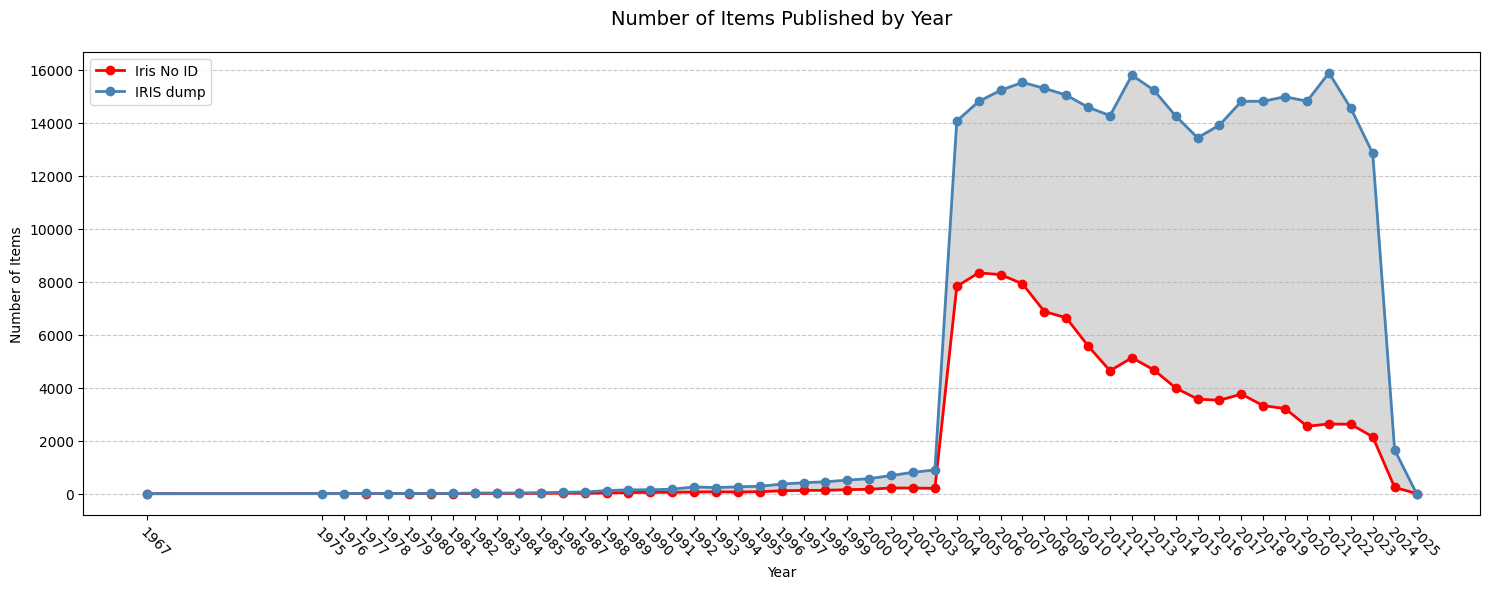

In [38]:
# plot
pdf = year_df.filter(pl.col('DATE_ISSUED_YEAR').dt.year() <= 2025).with_columns(pl.col('DATE_ISSUED_YEAR').dt.year()).sort('DATE_ISSUED_YEAR').to_pandas()
iris_pdf = iris_year_df.filter(pl.col('DATE_ISSUED_YEAR').dt.year() <= 2025).with_columns(pl.col('DATE_ISSUED_YEAR').dt.year()).sort('DATE_ISSUED_YEAR').to_pandas()


common_years = sorted(set(pdf['DATE_ISSUED_YEAR']).intersection(set(iris_pdf['DATE_ISSUED_YEAR'])))

pdf_mask = pdf['DATE_ISSUED_YEAR'].isin(common_years)
iris_mask = iris_pdf['DATE_ISSUED_YEAR'].isin(common_years)


fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(pdf['DATE_ISSUED_YEAR'], pdf['len'],
         marker='o',
         linewidth=2,
         markersize=6,
         color='red')
plt.plot(iris_pdf['DATE_ISSUED_YEAR'], iris_pdf['len'],
         marker='o',
         linewidth=2,
         markersize=6,
         color='steelblue')

plt.title('Number of Items Published by Year', pad=20, size=14)
plt.xlabel('Year')
plt.ylabel('Number of Items')
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.fill_between(common_years,
                 pdf[pdf_mask]['len'],
                 iris_pdf[iris_mask]['len'],
                 alpha=0.3,
                 color='grey')

plt.legend(['Iris No ID', 'IRIS dump'], loc='upper left')


plt.xticks(iris_pdf['DATE_ISSUED_YEAR'], rotation=-45, ha='left', va='top', rotation_mode='anchor')
plt.tight_layout()
plt.show()


#### Linguistic analysis

In [17]:
inoid_df.group_by('LAN_ISO').agg(pl.len()).sort('len', descending=True)

LAN_ISO,len
str,u32
"""ita""",48604
"""eng""",39153
null,8509
"""fre""",1318
"""eng; ita""",1125
"""spa""",1097
"""ger""",461
"""por""",247
"""rus""",112


---

## ID Reconciliation with Crossref

In [31]:
found_df = pl.read_csv("./crossref_results.csv")

In [32]:
found_df = found_df.join(inoid_df, left_on='item_id', right_on="ITEM_ID")
found_df.__len__()

18498

In [106]:
found_df.filter(pl.col('doi').is_duplicated()).sort('doi')

item_id,matched_title,doi,issn,ambiguous_match,score,IDE_DOI,IDE_ISBN,IDE_PMID,OWNING_COLLECTION,OWNING_COLLECTION_DES,DES_ALLPEOPLE,DES_NUMBEROFAUTHORS,DATE_ISSUED_YEAR,TITLE,PUB_NAME,PUB_PLACE,PUB_COUNTRY,LAN_ISO
i64,str,str,str,bool,f64,str,str,str,i64,str,str,i64,i64,str,str,str,str,str
92281,"""Vascular endothelial growth fa…","""10.1002/1529-0131(200011)43:11…","""0004-3591""",false,95.99477,null,null,null,35,"""1.01 Articolo in rivista""","""pulsatelli l.; dolzani p.; sil…",7,2007,"""Circulating RANKL/OPG in polym…",null,null,null,"""eng"""
58651,"""Vascular endothelial growth fa…","""10.1002/1529-0131(200011)43:11…","""0004-3591""",false,87.60318,null,null,null,35,"""1.01 Articolo in rivista""","""pulsatelli l.; dolzani p.; sil…",6,2005,"""Vascular endothelial growth fa…",null,null,null,"""eng"""
85384,"""Vascular endothelial growth fa…","""10.1002/1529-0131(200011)43:11…","""0004-3591""",false,98.22835,null,null,null,35,"""1.01 Articolo in rivista""","""pulsatelli l.; dolzani p.; sil…",8,2006,"""Synovial expression of vasoact…",null,null,null,"""eng"""
290836,"""Hydrologically Induced Karst D…","""10.1002/2017jb015252""","""2169-9313""",false,86.940384,null,null,null,58,"""4.02 Riassunto (Abstract)""","""serpelloni, enrico; gualandi, …",8,2017,"""Rainfall modulated deformation…",null,null,null,"""eng"""
339294,"""Hydrologically Induced Karst D…","""10.1002/2017jb015252""","""2169-9313""",false,86.940704,null,null,null,58,"""4.02 Riassunto (Abstract)""","""enrico serpelloni, adriano gua…",8,2017,"""Rainfall modulated deformation…",null,null,null,"""eng"""
339136,"""Hydrologically Induced Karst D…","""10.1002/2017jb015252""","""2169-9313""",false,94.24468,null,null,null,58,"""4.02 Riassunto (Abstract)""","""enrico serpelloni; francesco p…",8,2017,"""Hydrological deformation signa…",null,null,null,"""eng"""
87874,"""Dolomite‐Rich Condensed Sectio…","""10.1002/9781118485347.ch9""",null,false,128.15959,null,null,null,58,"""4.02 Riassunto (Abstract)""","""caja m.a.; marfil r.; garcia d…",7,2006,"""Petrography and geochemistry o…","""EGU""","""STRASBOURG""","""FRA""","""eng"""
100243,"""Dolomite‐Rich Condensed Sectio…","""10.1002/9781118485347.ch9""",null,false,100.55068,null,null,null,58,"""4.02 Riassunto (Abstract)""","""garcia d.;|caja m.a.; marfil r…",7,2007,"""K-feldspar albitization in the…","""s.n""","""s.l""",null,"""eng"""
100238,"""Dolomite‐Rich Condensed Sectio…","""10.1002/9781118485347.ch9""",null,false,115.86204,null,null,null,58,"""4.02 Riassunto (Abstract)""","""caja m.a.; marfil r.; garcia d…",7,2007,"""Provenance and reservoir quali…","""s.n""","""s.l""",null,"""eng"""


In [109]:
doi_list = found_df.with_columns(('doi:' + pl.col('doi')).str.to_lowercase().alias('id')).select('id')
doi_list.unique()

id
str
"""doi:10.1111/j.1365-2869.2007.0…"
"""doi:10.4081/mm.2005.3596"""
"""doi:10.1163/27725472-05002014"""
"""doi:10.1016/j.jchromb.2011.05.…"
"""doi:10.1016/j.jcpa.2009.06.003"""
"""doi:10.21071/calh.vi11.16753"""
"""doi:10.1200/jco.2004.99.220"""
"""doi:10.1007/978-3-031-38294-9_…"
"""doi:10.1109/ceidp.1996.564513"""


In [75]:
dupes_found = found_df.filter(pl.col('doi').is_duplicated()).sort('doi')

dupes_found.unique('doi')

item_id,matched_title,doi,issn,ambiguous_match,score,IDE_DOI,IDE_ISBN,IDE_PMID,OWNING_COLLECTION,OWNING_COLLECTION_DES,DES_ALLPEOPLE,DES_NUMBEROFAUTHORS,DATE_ISSUED_YEAR,TITLE,PUB_NAME,PUB_PLACE,PUB_COUNTRY,LAN_ISO
i64,str,str,str,bool,f64,str,str,str,i64,str,str,i64,i64,str,str,str,str,str
61904,"""Effect of Mg, Ca and Ba on the…","""10.1016/j.apcatb.2006.05.017""","""0926-3373""",false,92.68019,null,null,null,58,"""4.02 Riassunto (Abstract)""","""m. livi; f. basile; g. fornasa…",5,2004,"""Role of the effect of Mg, Ca a…","""s.n""","""VENEZIA""","""ITA""","""eng"""
343686,"""Ultra-Deep Sequencing (UDS) Al…","""10.1182/blood.v124.21.1856.185…","""0006-4971""",false,244.3336,null,null,null,40,"""1.06 Abstract in rivista""","""caterina de benedittis, simona…",21,2014,"""Ultra-Deep Sequencing (UDS) Al…",null,null,null,"""eng"""
253817,"""First Report of Resistance of …","""10.1094/pdis-02-16-0237-pdn""","""0191-2917""",false,106.64693,null,null,null,59,"""4.03 Poster""","""collina, m.; merighi, m; minut…",5,2015,"""Efficacy of fungicides against…",null,null,"""DEU""","""eng"""
124801,"""Effects of mechanical pre-bloo…","""10.20870/oeno-one.2011.45.1.14…","""2494-1271""",false,119.387054,null,null,null,57,"""4.01 Contributo in Atti di con…","""filippetti i.; allegro g.l.; v…",6,2009,"""Effects of pre-bloom defoliati…","""s.n""","""DAVIS""","""USA""","""eng"""
56616,"""Detection of hepatitis E virus…","""10.1136/vr.161.12.422""","""0042-4900""",false,113.0577,null,null,null,58,"""4.02 Riassunto (Abstract)""","""caprioli a.; martelli f.; di b…",7,2005,"""PCR detection of swine hepatit…","""s.n""","""ORVIETO""","""ITA""","""eng"""
170593,"""Identification of A Pharmacoge…","""10.1182/blood.v116.21.967.967""","""0006-4971""",false,237.88379,null,null,null,58,"""4.02 Riassunto (Abstract)""","""i iacobucci ;a lonetti ;a cand…",22,2011,"""PHARMACOGENOMIC PROFILE ASSOCI…",null,null,null,"""eng"""
808441,"""Il Progetto 4CH per un Centro …","""10.36253/rar-14320""","""2465-2377""",false,138.37381,null,null,null,35,"""1.01 Articolo in rivista""","""favaretto g., longo d., orland…",6,2023,"""Abilità tradizionali ed emerge…",null,null,null,"""ita"""
87261,"""Anthropometric and strength va…","""10.1016/s0021-9290(06)85294-2""","""0021-9290""",false,126.290184,null,null,null,58,"""4.02 Riassunto (Abstract)""","""m. l. zampagni; d. casino; g. …",8,2006,"""Anthropometric and strength va…",null,null,null,"""eng"""
325195,""":<i>Corpi invasi e viaggi dell…","""10.1086/scj23076903""","""0361-0160""",false,145.2306,null,null,null,37,"""1.03 Recensione in rivista""","""v. lavenia""",1,2010,"""Anime inquiete, menti insane, …",null,null,null,"""ita"""


## Search within OpenCitations

In [127]:
import os
import tempfile
from zipfile import ZipFile
from tqdm import tqdm


def process_meta_zip(zip_path, pid_list):
    zip_file = ZipFile(zip_path)
    files_list = [zipfile for zipfile in zip_file.namelist()
                  if zipfile.endswith('.csv')]

    output_iim = Path("./inoid_in_meta")
    output_iim.mkdir(parents=True, exist_ok=True)

    dois_isbns_pmids_lf = pid_list.lazy()


    for csv_file in tqdm(files_list, desc="Processing Meta CSV files"):
        with zip_file.open(csv_file, 'r') as file:
            with tempfile.NamedTemporaryFile() as tf:
                tf.write(file.read())
                tf.seek(0)
                os.makedirs(output_iim, exist_ok=True)
                df = (
                    pl.scan_csv(tf.name)
                    .select(['id', 'title', 'type'])
                    .with_columns(
                        (pl.col('id').str.extract(
                            r"(omid:[^\s]+)")).alias('omid'),
                        (pl.col('id').str.extract(
                            r"((?:doi):[^\s\"]+)")).alias('doi'),
                        (pl.col('id').str.extract(
                            r"((?:pmid):[^\s\"]+)")).alias('pmid'),
                        (pl.col('id').str.extract(
                            r"((?:isbn):[^\s\"]+)")).alias('isbn'),
                    )
                    .with_columns(
                        pl.coalesce([pl.col('doi'), pl.col('pmid'),
                                     pl.col('isbn')]).alias('id')
                    )
                    .drop(['doi', 'pmid', 'isbn'])
                    .drop_nulls('id')
                    .join(dois_isbns_pmids_lf, on='id', how='inner')
                    .collect(streaming=True)
                )

            if not df.is_empty():
                df.write_parquet(os.path.join(output_iim, os.path.basename(
                    csv_file).replace('.csv', '.parquet')))

    (
        pl.scan_parquet(output_iim / "*.parquet")
    ).sink_parquet(output_iim / "inoid_in_meta.parquet")

    for file in os.listdir(output_iim):
        if file != 'inoid_in_meta.parquet':
            os.remove(os.path.join(output_iim, file))

    print(f"Iris In Meta saved to '{output_iim}/inoid_in_meta.parquet'")

In [118]:
process_meta_zip("../../data/csv_openalex.zip", doi_list.unique())

Processing Meta CSV files: 100%|██████████| 28248/28248 [08:51<00:00, 53.19it/s]


Iris In Meta saved to 'inoid_in_meta/inoid_in_meta.parquet'


In [121]:
df = pl.scan_parquet("./inoid_in_meta/*.parquet").collect()
df

id,title,type,omid
str,str,str,str
"""doi:10.1097/brs.0b013e3181859a…","""Eosinophilic Granuloma Of The …","""journal article""","""omid:br/0690102323"""
"""doi:10.1016/j.jimonfin.2015.02…","""The Macroeconomic Impact Of Fi…","""journal article""","""omid:br/06902667041"""
"""doi:10.1016/j.jimonfin.2015.02…","""Announcements Of ECB Unconvent…","""journal article""","""omid:br/06902667046"""
"""doi:10.1007/978-3-319-08660-6_…","""Submarine Mass-Movements On Vo…","""book chapter""","""omid:br/06902661957"""
"""doi:10.1163/9789004281769""","""Echoes Of An Invisible World""","""book""","""omid:br/06902663318"""
"""doi:10.5194/hessd-3-201-2006""","""Classification Of Heterogeneou…","""web content""","""omid:br/06903205011"""
"""doi:10.1111/aor.12106""","""Extracorporeal Detoxification …","""journal article""","""omid:br/06902198134"""
"""doi:10.4081/monaldi.2008.397""","""The Value Of Transbronchial Lu…","""journal article""","""omid:br/06901533236"""
"""doi:10.47109/0102200109""","""Se La Tv È Un White Cube. Tras…","""journal article""","""omid:br/06901532594"""


In [123]:
df.__len__() / inoid_df.__len__() * 100

10.209156493876668